In [ ]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten


In [ ]:
train_dir = "/content/drive/MyDrive/AI last sem/week4/DevanagariHandwrittenDigitDataset (1)/Train"
test_dir = "/content/drive/MyDrive/AI last sem/week4/DevanagariHandwrittenDigitDataset (1)/Test"

In [ ]:
def load_images(data_dir, image_size=(28, 28)):
    images = []
    labels = []
    class_names = sorted(os.listdir(data_dir))  # Get class labels from folder names
    class_map = {name: i for i, name in enumerate(class_names)}

    for class_name in class_names:
        class_path = os.path.join(data_dir, class_name)
        if os.path.isdir(class_path):
            for file in os.listdir(class_path):
                file_path = os.path.join(class_path, file)
                try:
                    image = Image.open(file_path).convert('L')  #Convert to grayscale
                    image = image.resize(image_size)
                    image_array = np.array(image) / 256.0  # Normalize
                    images.append(image_array)
                    labels.append(class_map[class_name])
                except Exception as e:
                    print(f"Error loading {file_path}: {e}")

    return np.array(images), np.array(labels)

X_train, y_train = load_images(train_dir)
X_test, y_test = load_images(test_dir)

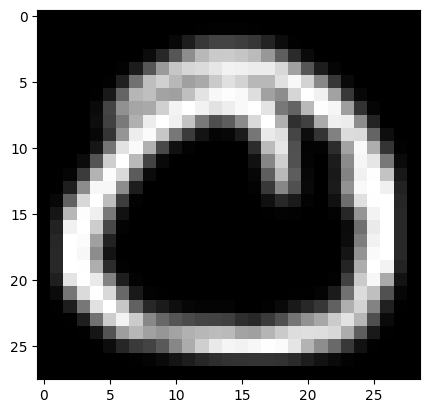

In [ ]:
plt.imshow(X_train[500], cmap='gray')
plt.show()

In [ ]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

num_classes = len(np.unique(y_train))
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)


Training Data Shape: (17072, 28, 28, 1), Labels: (17072, 10)
Testing Data Shape: (3000, 28, 28, 1), Labels: (3000, 10)


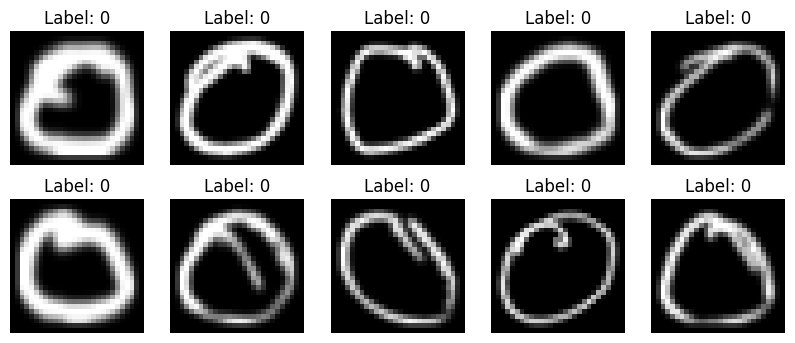

In [ ]:
print(f"Training Data Shape: {X_train.shape}, Labels: {y_train.shape}")
print(f"Testing Data Shape: {X_test.shape}, Labels: {y_test.shape}")

plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {np.argmax(y_train[i])}")
    plt.axis("off")
plt.show()

In [ ]:
model  = Sequential()

model.add(Flatten(input_shape=(28,28,1)))
model.add(Dense(64,activation="sigmoid"))
model.add(Dense(128,activation="sigmoid"))
model.add(Dense(256,activation="sigmoid"))
model.add(Dense(10,activation="softmax"))


model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,154 (367.79 KB)

 Trainable params: 94,154 (367.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
batch = 128
epochs = 100

history = model.fit(X_train,y_train,batch_size=batch,epochs=epochs,validation_split=0.2)

Epoch 1/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 1.0000 - loss: 3.1352e-06 - val_accuracy: 0.1766 - val_loss: 11.2698
Epoch 2/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 1.0000 - loss: 2.9728e-06 - val_accuracy: 0.1780 - val_loss: 11.2753
Epoch 3/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 1.0000 - loss: 3.0091e-06 - val_accuracy: 0.1789 - val_loss: 11.3322
Epoch 4/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 1.0000 - loss: 2.9145e-06 - val_accuracy: 0.1728 - val_loss: 11.4099
Epoch 5/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 1.0000 - loss: 2.3637e-06 - val_accuracy: 0.1734 - val_loss: 11.4065
Epoch 6/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 1.0000 - loss: 2.3129e-06 - val_accuracy: 0.1789 - val_loss: 11.3909
Epoch 7/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 1.0000 - loss: 2.2792e-06 - val_accuracy: 0.1754 - val_loss: 11.4323
Epoch 8/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accurac

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

94/94 - 0s - 3ms/step - accuracy: 0.8230 - loss: 2.6964
Test accuracy: 0.8230


In [ ]:
model.save('devnagari_fcn.h5')

loaded_model = tf.keras.models.load_model('devnagari_fcn.h5')
loaded_model.evaluate(X_test, y_test)

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9687 - loss: 0.3678


[2.6964356899261475, 0.8230000138282776]

In [ ]:
pred = model.predict(X_test)
labels = np.argmax(pred, axis=1)

for i in range(10):
  print(f"Predicted: {labels[i]}, Actual: {np.argmax(y_test[i])}")


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0


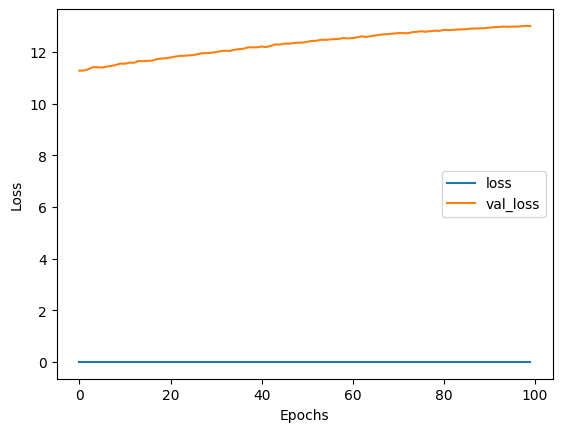

In [ ]:
plt.plot(history.history["loss"],label="loss")
plt.plot(history.history["val_loss"],label="val_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()